

*   Marwan Yasser Mostafa: 20180270
*   Mohamed Sayed Hassan:  20180224




In [ ]:
import cv2
import matplotlib.pyplot as plt
from random import randint,choice
import numpy as np
from skimage.filters import rank
from PIL import Image,ImageFilter


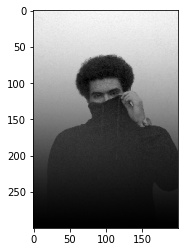

In [ ]:
Iimg=cv2.imread('img.jpg',0)
img=cv2.resize(img,(200,300))
plt.imshow(img,cmap='gray')



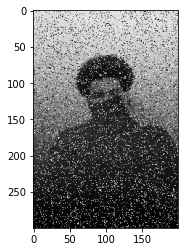

In [ ]:
def sp(im):
  no_pixels=randint(0,(im.shape[0]*im.shape[1])//4)
  pixels=[]
  for i in range (no_pixels):
    z=(randint(0,im.shape[0]-1),randint(0,im.shape[1]-1))
    pixels.append(z)
  
  for x,y in pixels:
     SorP= choice([0, 255])
     im[x][y]=SorP
  return im

noise_img=sp(img)
plt.imshow(noise_img,cmap='gray')


# MEAN filter (3,3)

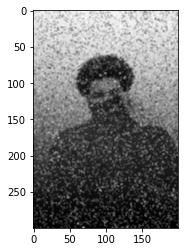

In [ ]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)

plt.imshow(dst,cmap='gray')

#median filter

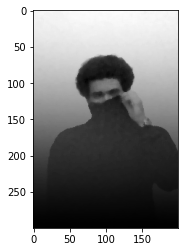

In [ ]:
median = cv2.medianBlur(img, 5)
plt.imshow(median,cmap='gray')

#rank filter

In [ ]:
pip install mahotas

     |████████████████████████████████| 5.7 MB 10.3 MB/s 


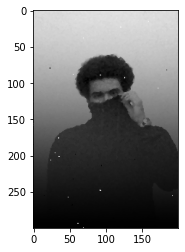

In [ ]:
import mahotas
new_img = mahotas.rank_filter(noise_img, 3, 4)
plt.imshow(new_img,cmap='gray')


# Sharpening Filters

preparing image

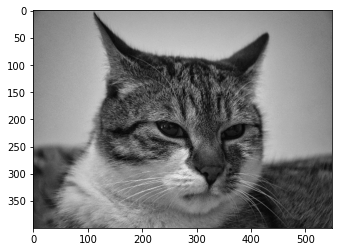

In [ ]:
img=cv2.imread('cat.jpg',0)
img=cv2.resize(img,(550,400))
plt.imshow(img,cmap='gray')

## Perwitt

In [ ]:
def perwitt(size):
  filter1 = [[ math.floor( size /2)*-1 for i in range(size)] for j in range(size)]
  for i in range(1,size):
    filter1[i] = [x+1 for x in filter1[i-1]]
  filter1 = np.array(filter1)
  filter1.reshape(size,size)                      # for df/dy
  filter2 = np.transpose(filter1)                 # for df/dx
  return filter1,filter2

In [ ]:
dy,dx = perwitt(3)
sharpen_dy = cv2.filter2D(img,-1,dy)                                  # df/dy
sharpen_dx = cv2.filter2D(img,-1,dx)                                  # df/dx
mag = np.sqrt( np.square(sharpen_dy) + np.square(sharpen_dx))
mag = np.array(mag,dtype = np.float32)                               
phase = np.arctan(sharpen_dy/sharpen_dx)
phase[np.isnan(phase)] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


plot df/dx

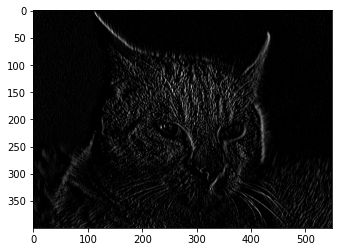

In [ ]:
plt.imshow(sharpen_dx,cmap='gray')

plot df/dy

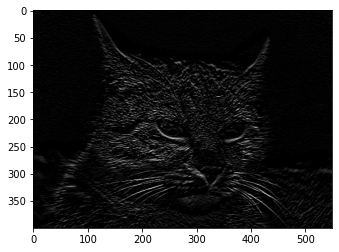

In [ ]:
plt.imshow(sharpen_dy,cmap='gray')

plot magnitude

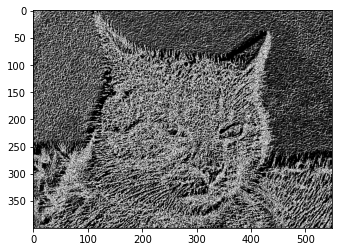

In [ ]:
plt.imshow(mag,cmap='gray')

plot phase

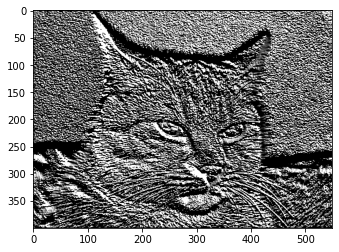

In [ ]:
plt.imshow(phase,cmap='gray')

## Sobel

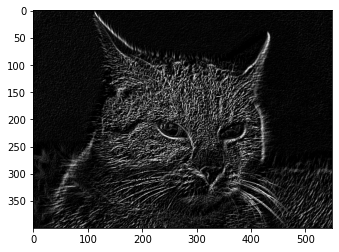

In [ ]:
def sobel(img,size):
  img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=size)
  img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=size)
  img_sobel = img_sobelx + img_sobely 
  return img_sobel
plt.imshow(sobel(img,3),cmap='gray')

## Laplacian

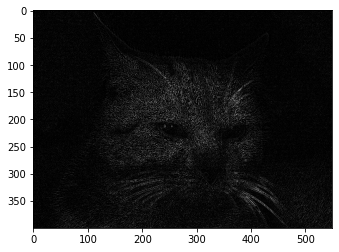

In [ ]:
def laplace(img,size):
  lap = cv2.Laplacian(img,-1,size)
  return lap

plt.imshow(laplace(img,3),cmap='gray')